In [2]:
import pandas as pd
import numpy as np
import sklearn
#pip install -U scikit-learn 

In [3]:
df =pd.read_csv('D:/DATA/Projects/Cryptocurrency.csv')

# predict marketcap volume of company

In [4]:
df.head()
#x=Volume,Market Cap
#y=Currency

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,46048752.0,824588509
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,41462224.0,853213342
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,27574097.0,817872179
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,24127567.0,828296390
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,28706667.0,879181680


In [5]:
df.tail()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
7231,eos,"May 02, 2013",3.78,4.04,3.01,3.37,0.0,58287979
7232,eos,"May 01, 2013",4.29,4.36,3.52,3.80,0.0,65604596
7233,eos,"Apr 30, 2013",4.40,4.57,4.17,4.30,0.0,74020918
7234,eos,"Apr 29, 2013",4.37,4.57,4.23,4.38,0.0,75388964
7235,eos,"Apr 28, 2013",4.30,4.40,4.18,4.35,0.0,74636938


In [6]:
import matplotlib.pyplot as plt

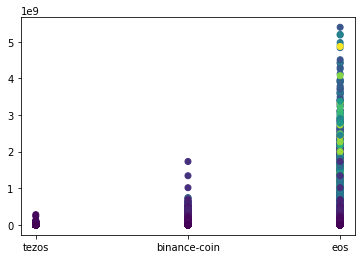

In [7]:
plt.scatter(df['Currency'],df['Volume'],c=df['Market Cap'])

In [8]:
df.dtypes
#matain daat type x in float and y in object

Currency       object
Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap      int64
dtype: object

In [9]:
#df = float('Volume')

In [10]:
x = df.iloc[:,6:8].values      
#if x ids not in float then its get convert ointo float

In [11]:
x

array([[4.60487520e+07, 8.24588509e+08],
       [4.14622240e+07, 8.53213342e+08],
       [2.75740970e+07, 8.17872179e+08],
       ...,
       [0.00000000e+00, 7.40209180e+07],
       [0.00000000e+00, 7.53889640e+07],
       [0.00000000e+00, 7.46369380e+07]])

In [12]:
y = df.iloc[:,0].values

In [13]:
y

array(['tezos', 'tezos', 'tezos', ..., 'eos', 'eos', 'eos'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder

# we have to lable encode to y

In [15]:
LabelEncoder_y = LabelEncoder()
y = LabelEncoder_y.fit_transform(y)

In [16]:
y

array([2, 2, 2, ..., 1, 1, 1])

In [17]:
# import train_test_split model

from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [19]:
#1. Logistic Regression

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7236 entries, 0 to 7235
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Currency    7236 non-null   object 
 1   Date        7236 non-null   object 
 2   Open        7236 non-null   float64
 3   High        7236 non-null   float64
 4   Low         7236 non-null   float64
 5   Close       7236 non-null   float64
 6   Volume      7236 non-null   float64
 7   Market Cap  7236 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 452.4+ KB


In [21]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()


In [22]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred = logmodel.predict(x_test)

In [24]:
y_pred

array([2, 0, 0, ..., 1, 0, 0])

In [25]:
y_test

array([2, 1, 0, ..., 1, 0, 1])

In [26]:
#KNeighbors

In [31]:

from sklearn.neighbors import KNeighborsClassifier
classifier_knn= KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier_knn.fit(x_train,y_train)

#find nearest 5 neighbours then predict outcomes

KNeighborsClassifier()

In [32]:
y_pred =classifier_knn.predict(x_test)

In [33]:
y_pred

array([2, 1, 0, ..., 1, 0, 0])

In [34]:
#SVM(support vector machine)

In [35]:

from sklearn.svm import SVC
classifier_svm_sigmoid = SVC(kernel='sigmoid')
classifier_svm_sigmoid.fit(x_train,y_train)


#SVM(support vector machine) in that they have many kernel like sigmoid,polynoial,linear,etc.

SVC(kernel='sigmoid')

In [36]:
y_pred =classifier_svm_sigmoid.predict(x_test)

In [37]:
y_pred

array([2, 0, 1, ..., 2, 1, 0])

In [ ]:

from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel='linear')
classifier_svm_linear.fit(x_train,y_train)


In [ ]:
y_pred =classifier_svm_linear.predict(x_test)

In [ ]:
y_pred

In [38]:

from sklearn.svm import SVC
classifier_svm_poly = SVC(kernel='poly')
classifier_svm_poly.fit(x_train,y_train)


SVC(kernel='poly')

In [39]:
y_pred =classifier_svm_poly.predict(x_test)

In [40]:
y_pred

array([2, 2, 0, ..., 1, 2, 2])

In [41]:
#Decission tree

In [42]:

from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier (criterion='entropy')
classifier_dt.fit(x_train,y_train)

#entropy is nothing but measure of impurity,its to decide impurity in data is high or not as compaire to data

DecisionTreeClassifier(criterion='entropy')

In [43]:
y_pred =classifier_dt.predict(x_test)

In [44]:
y_pred

array([2, 0, 0, ..., 1, 0, 0])

In [45]:
#RandomForest

In [46]:

from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier (n_estimators=3,criterion='entropy')
classifier_rf.fit(x_train,y_train)

#estimator is the how many times we have to run decision tree

RandomForestClassifier(criterion='entropy', n_estimators=3)

In [47]:
y_pred =classifier_rf.predict(x_test)

In [48]:
y_pred

array([2, 0, 0, ..., 1, 0, 0])

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,y_pred)

0.4979281767955801